**Dhava Gautama**
<br>Klasifikasi kategori gambar. Data yang digunakan adalah data **Intel Image Classification** yang bersumber dari **Kaggle** (https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

In [1]:
# Instal Kaggle Api
!pip install -q kaggle

In [2]:
# Upload API token
from google.colab import files
files.upload()
# print('Redacted')

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dhavagautama","key":"a0426f1960c5e71adff5a86f112b7fef"}'}

In [3]:
# Config Kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Download & Extract Dataset
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -qq intel-image-classification.zip

 94% 326M/346M [00:01<00:00, 173MB/s]
100% 346M/346M [00:01<00:00, 194MB/s]


In [5]:
# Import Library 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib, os, random, shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf
import glob as gb

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [6]:
# Satukan data
!rsync -a /content/seg_test/seg_test/ /content/seg_train/seg_train/
# Memisahkan Train Set dan Validation Set
base_dir = "/content/seg_train/seg_train/"
train_dir = "/content/train/"
val_dir = "/content/val/"
os.mkdir(train_dir)
os.mkdir(val_dir)

train_buildings = os.path.join(train_dir, 'buildings')
train_forest = os.path.join(train_dir, 'forest')
train_glacier = os.path.join(train_dir, 'glacier')
train_mountain = os.path.join(train_dir, 'mountain')
train_sea = os.path.join(train_dir, 'sea')
train_street = os.path.join(train_dir, 'street')

val_buildings = os.path.join(val_dir, 'buildings')
val_forest = os.path.join(val_dir, 'forest')
val_glacier = os.path.join(val_dir, 'glacier')
val_mountain = os.path.join(val_dir, 'mountain')
val_sea = os.path.join(val_dir, 'sea')
val_street = os.path.join(val_dir, 'street')

os.mkdir(train_buildings)
os.mkdir(train_forest)
os.mkdir(train_glacier)
os.mkdir(train_mountain)
os.mkdir(train_sea)
os.mkdir(train_street)

os.mkdir(val_buildings)
os.mkdir(val_forest)
os.mkdir(val_glacier)
os.mkdir(val_mountain)
os.mkdir(val_sea)
os.mkdir(val_street)

buildings_dir = os.path.join(base_dir,'buildings')
forest_dir = os.path.join(base_dir, 'forest')
glacier_dir = os.path.join(base_dir, 'glacier')
mountain_dir = os.path.join(base_dir, 'mountain')
sea_dir = os.path.join(base_dir, 'sea')
street_dir = os.path.join(base_dir, 'street')

train_buildings_dir, val_buildings_dir = train_test_split(os.listdir(buildings_dir), test_size = 0.20)
train_forest_dir, val_forest_dir = train_test_split(os.listdir(forest_dir), test_size = 0.20)
train_glacier_dir, val_glacier_dir = train_test_split(os.listdir(glacier_dir), test_size = 0.20)
train_mountain_dir, val_mountain_dir = train_test_split(os.listdir(mountain_dir), test_size = 0.20)
train_sea_dir, val_sea_dir = train_test_split(os.listdir(sea_dir), test_size = 0.20)
train_street_dir, val_street_dir = train_test_split(os.listdir(street_dir), test_size = 0.20)

for file in train_buildings_dir:
  shutil.copy(os.path.join(buildings_dir, file), os.path.join(train_buildings, file))
for file in train_forest_dir:
  shutil.copy(os.path.join(forest_dir,file), os.path.join(train_forest,file))
for file in train_glacier_dir:
  shutil.copy(os.path.join(glacier_dir,file), os.path.join(train_glacier,file))
for file in train_mountain_dir:
  shutil.copy(os.path.join(mountain_dir, file), os.path.join(train_mountain, file))
for file in train_sea_dir:
  shutil.copy(os.path.join(sea_dir,file), os.path.join(train_sea,file))
for file in train_street_dir:
  shutil.copy(os.path.join(street_dir,file), os.path.join(train_street,file))


for file in val_buildings_dir:
  shutil.copy(os.path.join(buildings_dir, file), os.path.join(val_buildings, file))
for file in val_forest_dir:
  shutil.copy(os.path.join(forest_dir,file), os.path.join(val_forest,file))
for file in val_glacier_dir:
  shutil.copy(os.path.join(glacier_dir,file), os.path.join(val_glacier,file))
for file in val_mountain_dir:
  shutil.copy(os.path.join(mountain_dir, file), os.path.join(val_mountain, file))
for file in val_sea_dir:
  shutil.copy(os.path.join(sea_dir,file), os.path.join(val_sea,file))
for file in val_street_dir:
  shutil.copy(os.path.join(street_dir,file), os.path.join(val_street,file))

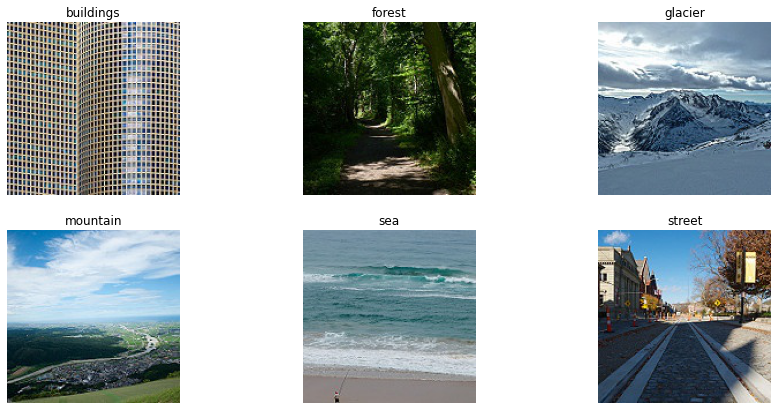

In [7]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  
  return img
plt.figure(figsize = (15,7))
plt.subplot(2,3,1)
gambar = view_random_image(train_dir, "buildings")
plt.subplot(2,3,2)
gambar = view_random_image(train_dir, "forest")
plt.subplot(2,3,3)
gambar = view_random_image(train_dir, "glacier")
plt.subplot(2,3,4)
gambar = view_random_image(train_dir, "mountain")
plt.subplot(2,3,5)
gambar = view_random_image(train_dir, "sea")
plt.subplot(2,3,6)
gambar = view_random_image(train_dir, "street")

In [8]:
# Check Train Image Size
size = []
for folder in  os.listdir(train_dir) : 
    files = gb.glob(pathname= str(train_dir + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13581
(135, 150, 3)        3
(113, 150, 3)        3
(131, 150, 3)        2
(144, 150, 3)        2
(110, 150, 3)        2
(143, 150, 3)        2
(149, 150, 3)        2
(111, 150, 3)        2
(108, 150, 3)        2
(141, 150, 3)        2
(136, 150, 3)        2
(105, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(123, 150, 3)        1
(147, 150, 3)        1
(146, 150, 3)        1
(115, 150, 3)        1
(81, 150, 3)         1
(134, 150, 3)        1
(102, 150, 3)        1
(140, 150, 3)        1
(72, 150, 3)         1
(120, 150, 3)        1
(142, 150, 3)        1
(76, 150, 3)         1
(124, 150, 3)        1
(133, 150, 3)        1
(97, 150, 3)         1
(119, 150, 3)        1
(145, 150, 3)        1
dtype: int64

In [9]:
# Check Val Image Size
size = []
for folder in  os.listdir(val_dir) : 
    files = gb.glob(pathname= str(val_dir + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    3398
(113, 150, 3)       4
(134, 150, 3)       1
(146, 150, 3)       1
(123, 150, 3)       1
(111, 150, 3)       1
(76, 150, 3)        1
(142, 150, 3)       1
(81, 150, 3)        1
dtype: int64

In [10]:
# Augmentasi Gambar
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
val_datagen = ImageDataGenerator(
    rescale = 1./225,
)

In [11]:
batch_size = 32
data_train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= batch_size,
    class_mode='categorical'
)

data_val = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 13625 images belonging to 6 classes.
Found 3409 images belonging to 6 classes.


In [12]:
# Model Sequential dengan Conv2D Maxpooling Layer
model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=6, activation='softmax')
    ])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                        

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.83 and logs.get('val_accuracy')>0.83):
      print("\nAkurasi train dan validasi didapat telah mencapai nilai > 83%!")
      self.model.stop_training = True

callbacks = myCallback()

In [17]:
history = model.fit(data_train, 
                    epochs = 50, 
                    validation_data = data_val, 
                    verbose = 2,
                    callbacks = [callbacks])

Epoch 1/50
426/426 - 82s - loss: 0.7350 - accuracy: 0.7295 - val_loss: 0.7724 - val_accuracy: 0.7178 - 82s/epoch - 191ms/step
Epoch 2/50
426/426 - 82s - loss: 0.6975 - accuracy: 0.7465 - val_loss: 0.7865 - val_accuracy: 0.7137 - 82s/epoch - 194ms/step
Epoch 3/50
426/426 - 81s - loss: 0.6433 - accuracy: 0.7724 - val_loss: 0.7712 - val_accuracy: 0.7099 - 81s/epoch - 189ms/step
Epoch 4/50
426/426 - 80s - loss: 0.6123 - accuracy: 0.7816 - val_loss: 0.9437 - val_accuracy: 0.6923 - 80s/epoch - 188ms/step
Epoch 5/50
426/426 - 82s - loss: 0.5858 - accuracy: 0.7926 - val_loss: 0.7340 - val_accuracy: 0.7319 - 82s/epoch - 193ms/step
Epoch 6/50
426/426 - 80s - loss: 0.5661 - accuracy: 0.7996 - val_loss: 0.5821 - val_accuracy: 0.7955 - 80s/epoch - 187ms/step
Epoch 7/50
426/426 - 80s - loss: 0.5398 - accuracy: 0.8136 - val_loss: 0.6051 - val_accuracy: 0.7900 - 80s/epoch - 187ms/step
Epoch 8/50
426/426 - 80s - loss: 0.5272 - accuracy: 0.8117 - val_loss: 0.5961 - val_accuracy: 0.7894 - 80s/epoch - 187

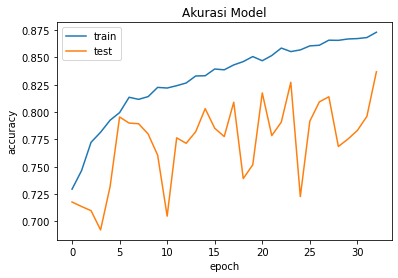

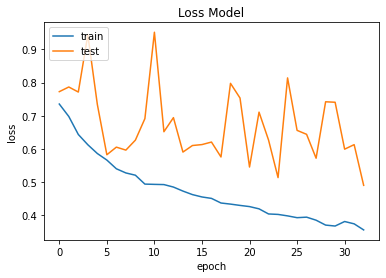

In [18]:
# Plot Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)